### Imports

In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scp

from sklearn.preprocessing import StandardScaler

from ucimlrepo import fetch_ucirepo

In [2]:
wine = fetch_ucirepo(id = 109)

In [3]:
wine_df = pd.concat([wine['data']['features'], wine['data']['targets']], axis = 1)
display(wine_df)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


weights and biases are joined within one matrix

In [4]:
# testing concat by columns
test_weights = torch.ones((4, 5))
display(test_weights)
test_biases = torch.zeros((4, 1))
display(test_biases)
test_concat = torch.concat([test_weights, test_biases], dim = 1)
display(test_concat)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

tensor([[0.],
        [0.],
        [0.],
        [0.]])

tensor([[1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 0.]])

In [5]:
# testing concat by rows
test_weights = torch.ones((3, 4))
display(test_weights)
test_biases = torch.zeros((2, 4))
display(test_biases)
test_concat = torch.concat([test_weights, test_biases], dim = 0)
display(test_concat)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [6]:
# testing stack by rows
test_weights = torch.ones((3, 4))
display(test_weights)
test_biases = torch.zeros((3, 4))
display(test_biases)
test_concat = torch.stack([test_weights, test_biases], dim = 0)
test_concat2 = torch.stack([test_weights, test_biases], dim = 2)
display(test_concat)
display(test_concat2)
display(test_concat2.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

tensor([[[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]]])

torch.Size([3, 4, 2])

In [7]:
# testing matrix multiplication in pytorch

# assume 50 samples, 12 features and we include a bias term
X = torch.randn((50, 12))
bias_ones = torch.ones((X.shape[0], 1))

W = torch.randn((X.shape[1] + 1, 1))
X_aug = torch.concat([bias_ones, X], dim = 1)

display(X_aug.shape)
display(X_aug[:, 0])

y = X_aug @ W
display(y.shape)


torch.Size([50, 13])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

torch.Size([50, 1])

In [8]:
# testing out torch.softmax
yhat = torch.randn(10, 3)
display(yhat)
sftmx = torch.softmax(yhat, dim = 1)
display(sftmx)

# testing out conditionals for tensors
yprobs = torch.sigmoid(torch.randn(5, 1))
display(yprobs)
preds = (yprobs > 0.5).int()
display(preds)

test = torch.randn(10, 3)
display(test)
t = torch.argmax(test, dim = 1).reshape((-1, 1))
display(t)

tensor([[-0.0849,  1.3958, -0.4461],
        [ 0.6607,  0.1479,  0.0814],
        [-0.1082,  0.4764, -0.1749],
        [-0.1064,  0.1809,  0.1222],
        [ 0.3902, -0.6029, -0.6769],
        [-0.7144, -0.7206, -0.3378],
        [-0.0020,  0.0891,  1.6019],
        [-0.6977, -0.9163, -0.4028],
        [ 1.2552, -0.4453,  0.1804],
        [-0.0183, -0.5846,  0.0599]])

tensor([[0.1641, 0.7215, 0.1144],
        [0.4632, 0.2773, 0.2595],
        [0.2681, 0.4811, 0.2508],
        [0.2786, 0.3713, 0.3501],
        [0.5833, 0.2161, 0.2006],
        [0.2898, 0.2880, 0.4223],
        [0.1415, 0.1550, 0.7035],
        [0.3178, 0.2554, 0.4268],
        [0.6562, 0.1198, 0.2240],
        [0.3775, 0.2143, 0.4082]])

tensor([[0.7093],
        [0.2566],
        [0.6864],
        [0.7802],
        [0.7233]])

tensor([[1],
        [0],
        [1],
        [1],
        [1]], dtype=torch.int32)

tensor([[-0.3236,  1.5433,  0.8216],
        [ 0.1772,  0.0634, -0.2172],
        [ 1.0074, -0.3058,  0.6432],
        [-0.6665, -1.0876, -0.0670],
        [-0.9397, -0.8472, -0.6444],
        [-1.4036,  0.7596, -0.3334],
        [-1.3719, -0.1868,  0.6557],
        [ 0.7468,  1.4738,  0.1872],
        [ 1.0990,  1.5713, -0.3165],
        [ 1.9967,  0.5346, -0.2253]])

tensor([[1],
        [0],
        [0],
        [2],
        [2],
        [1],
        [2],
        [1],
        [1],
        [0]])

In [9]:
# def l2_loss(y_hat, y):
#     loss = torch.sum((y_hat - y)**2)
#     return loss

def l1_loss(y_hat, y):
    loss = torch.sum(torch.abs(y_hat - y))
    # print(loss)
    return loss

def l2_loss(y_hat, y):
    loss = torch.sum((y_hat - y)**2)

def ce_loss(y_hat, y):
    # initial definition
    loss = torch.sum(-y * torch.log(y_hat))

    # numerically stable CE
    # logits = torch.log(y_hat) - torch.log(y_hat - 1)
    # loss = torch.sum(-y * torch.log1p(logits))
    return loss


def get_l2_grad(X, y, y_hat):
    dW = (2/X.shape[0]) * (X.T @ (y-y_hat))
    db = (2/X.shape[0]) * torch.sum(y - y_hat)
    return dW, db

def get_bce_grad(X, y, y_hat):
    dW = X.T @ (y_hat - y)
    db = torch.mean(y_hat - y, dim = 0)
    return dW, db


def get_mce_grad(X, y, y_hat):
    dW = X.T @ (y_hat - y)
    db = torch.mean(y_hat - y, dim = 0)
    return dW, db

### Models

In [10]:
class LinearRegression:
    def __init__(self, num_features, num_classes, loss_fn, get_grad):
        self.num_features = num_features
        self.num_classes = num_classes
        self.loss_fn = loss_fn
        self.get_grad = get_grad
        self.losses = []

        self.init_weights()

    def init_weights(self):
        self.W = torch.normal(0, 0.01, (self.num_features, self.num_classes), dtype = torch.float64)
        self.b = torch.zeros(self.num_classes, dtype = torch.float64)       # could try an array of biases to see if it helps

    def fit(self, X, y, epochs = 1000, lr = 0.01, loss_threshold = 1e-3):
        # enforce right dimensions
        assert X.shape[1] == self.num_features and y.shape[1] == self.num_classes
        self.losses = []
        
        # computes the gradient descent version of linear regression
        for t in range(epochs):
            y_hat = self.forward(X)
            loss = self.loss_fn(X, y)
            self.losses.append(loss)

            if loss < loss_threshold:
                break

            # compute gradient
            # dW = (2/X.shape[0]) * (X.T @ (y - y_hat))
            # db = (2/X.shape[0]) * torch.sum(y - y_hat)
            dW, db = self.get_grad(X, y, y_hat)

            # update features
            self.W = self.W - (lr * dW)
            self.b = self.b - (lr * db)


    def fit_OLS(self, X, y):
        assert X.shape[1] == self.num_features and y.shape[1] == self.num_classes

        # compute OLS solution
        W_OLS = torch.inverse(X.T @ X) @ X.T @ y
        b_OLS = torch.mean(y) - torch.mean(X @ W)
        self.W = W_OLS
        self.b = b_OLS

    def __call__(self, X):
        return self.forward(X)

    def forward(self, X):
        # assert X is of the shape (num_inputs, num_features)
        assert X.shape[1] == self.num_features
        return (X @ self.W) + self.b
    
    def predict_proba(self, X_val):
        return torch.sigmoid(self.forward(X_val)) \
            if self.num_classes == 1 \
                else torch.softmax(self.forward(X_val), dim = 1, dtype=float)
    def predict(self, X_val):
        # also split into 2 cases for binary- and multi- classification
        if self.num_classes == 1:
            # binary classification
            preds = self.predict_proba(X_val)
            return (preds > 0.5).int()
        else:
            # multiclassification
            preds = self.predict_proba(X_val)
            return torch.argmax(preds, dim = 1).reshape((-1, 1))    # could get rid of the reshape
            
    

In [11]:
class LogisticRegression:

    def __init__(self, num_features, loss_fn, get_grad):
        self.num_features = num_features
        self.loss_fn = loss_fn
        self.get_grad = get_grad
        self.losses = []

        self.init_weights
    def init_weights(self):
        self.W = torch.normal(0, 1, size = (self.num_features, 1))
        self.b = 0.

    def fit(self, X, y, epochs = 1000, lr = 0.01, loss_threshold = 1e-3):
        assert X.shape[1] == self.num_features

        self.losses = []
        for epoch in epochs:
            y_hat = self.forward(X)

            # compute loss
            loss = self.loss_fn(y_hat, y)
            self.losses.append(loss)
            if loss < loss_threshold:
                break

            # compute gradient
            # dW = 2 * (X.T @ (y_hat - y)) / X.shape[0]
            # db = 2 * torch.sum(y_hat - y) / X.shape[0]
            dW, db = self.get_grad(X, y, y_hat)

            # update weights
            self.W = self.W - (lr * dW)
            self.b = self.b - (lr * db)

    def fit_OLS(self, X, y):
        
        W_OLS = torch.inverse(X.T @ X) @ X.T @ y
        b_OLS = torch.mean(y) - torch.mean(X @ W_OLS)

        self.W = W_OLS
        self.b = b_OLS

    def forward(self, X):
        return torch.sigmoid(X @ self.W + self.b)
    
    def __call__(self, X):
        return self.forward(X)
    
    def predict_proba(self, X):
        return self.forward(X)

    def predict(self, X):
        return (self.forward(X) > 0.5).int()
    
    def verify_grad(self, X, y, threshold):
        epsilon = 1e-5

        wd = self.W[0]
        w_minus_d = self.W[1:]
        wpos = wd + epsilon
        wneg = wd - epsilon

        approx_dw = (self.loss_fn(wpos, w_minus_d) - self.loss_fn(wneg, w_minus_d))/(2*epsilon)

        y_hat = self.forward(X)
        analytical_dw = self.get_grad(X, y, y_hat)

        result = ((analytical_dw - approx_dw)**2)/((analytical_dw + approx_dw)**2)

        return result < threshold

### Display data

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


<Figure size 1000x2000 with 0 Axes>

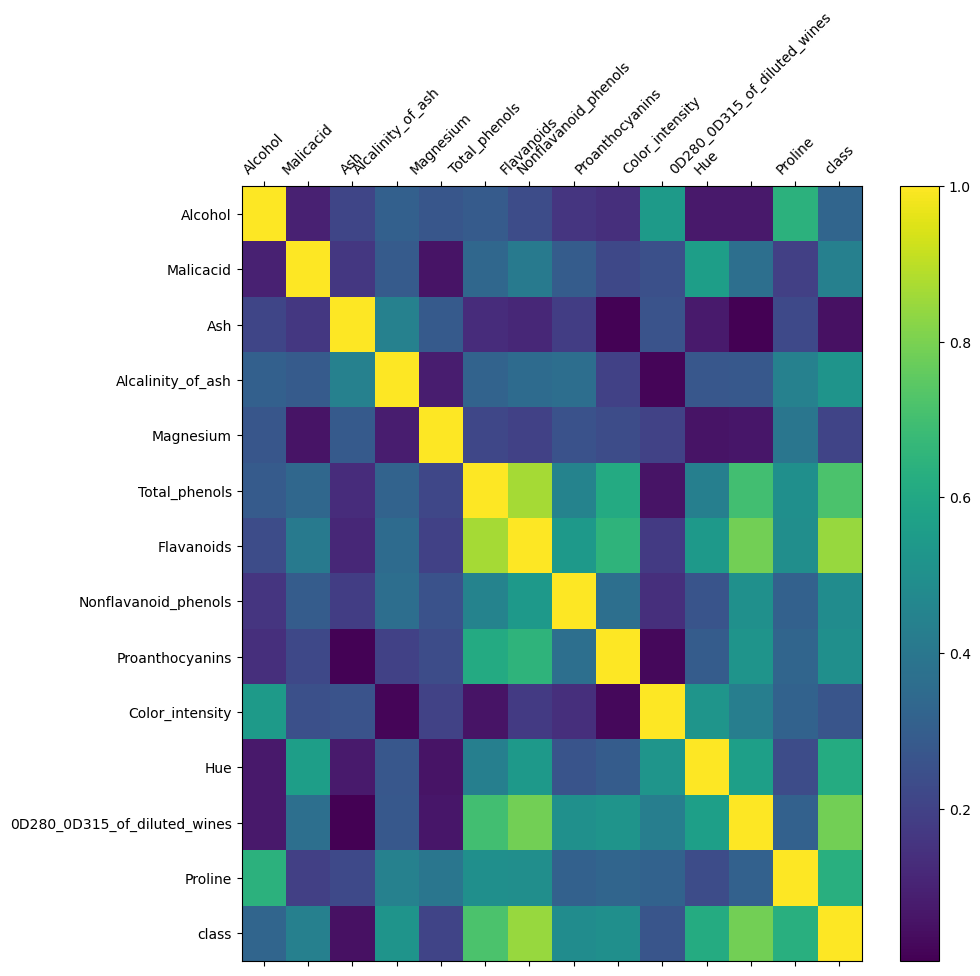

In [ ]:
display(wine_df)

corr_wine_df = wine_df.corr()
abs_corr_wine_df = np.abs(corr_wine_df)
plt.figure(figsize = (10, 20))
plt.matshow(abs_corr_wine_df, aspect = 'auto')
plt.xticks([i for i in range(len(wine_df.columns))], [i for i in wine_df.columns], rotation = 45)
plt.yticks([i for i in range(len(wine_df.columns))], [i for i in wine_df.columns])
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches(10, 10)

magnesium, ash and color intensity look like useless features

In [44]:
# normalize features
wine_std = wine_df.copy()
normalizer = StandardScaler()
wine_cols = wine_df.columns.values
wine_cols = np.delete(wine_cols, -1)
display(wine_cols)
wine_std[wine_cols] = normalizer.fit_transform(wine_std[wine_cols])


array(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'], dtype=object)

In [ ]:



# fig, axs = plt.subplots(3, 1)
# axs[0].matshow

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
Alcohol,1.000000,-0.040513,-0.148595,-0.318367,0.159361,0.420687,0.414904,0.015659,0.307571,0.408291,0.080020,0.069818,0.360646
Malicacid,-0.040513,1.000000,0.026221,0.060031,0.079317,-0.083514,-0.191278,-0.089366,-0.080798,-0.257587,-0.419981,0.173244,-0.372629
Ash,-0.148595,0.026221,1.000000,0.549330,0.382549,0.004802,-0.070454,0.465901,-0.145471,-0.124220,0.239214,-0.081593,-0.029525
Alcalinity_of_ash,-0.318367,0.060031,0.549330,1.000000,0.238337,-0.222999,-0.287103,0.302262,-0.173628,-0.210951,0.092980,-0.117704,-0.122436
Magnesium,0.159361,0.079317,0.382549,0.238337,1.000000,0.307241,0.123332,0.237248,-0.059042,0.184661,-0.111386,0.120651,-0.147912
Total_phenols,0.420687,-0.083514,0.004802,-0.222999,0.307241,1.000000,0.803784,-0.016992,0.373601,0.650086,-0.224330,0.053165,0.294994
Flavanoids,0.414904,-0.191278,-0.070454,-0.287103,0.123332,0.803784,1.000000,-0.089538,0.548624,0.741560,0.007863,-0.088529,0.380446
Nonflavanoid_phenols,0.015659,-0.089366,0.465901,0.302262,0.237248,-0.016992,-0.089538,1.000000,-0.144535,-0.152460,0.411831,-0.323488,-0.015333
Proanthocyanins,0.307571,-0.080798,-0.145471,-0.173628,-0.059042,0.373601,0.548624,-0.144535,1.000000,0.424696,0.103937,0.003106,0.142166
Color_intensity,0.408291,-0.257587,-0.124220,-0.210951,0.184661,0.650086,0.741560,-0.152460,0.424696,1.000000,0.028228,-0.186899,0.588770


class                              
1      Alcohol                         1.000000
       Malicacid                      -0.040513
       Ash                            -0.148595
       Alcalinity_of_ash              -0.318367
       Magnesium                       0.159361
       Total_phenols                   0.420687
       Flavanoids                      0.414904
       Nonflavanoid_phenols            0.015659
       Proanthocyanins                 0.307571
       Color_intensity                 0.408291
       Hue                             0.080020
       0D280_0D315_of_diluted_wines    0.069818
       Proline                         0.360646
2      Alcohol                         1.000000
       Malicacid                      -0.021362
       Ash                            -0.214851
       Alcalinity_of_ash              -0.056282
       Magnesium                      -0.029911
       Total_phenols                  -0.046321
       Flavanoids                     -0.038247
    

class                              
1      Alcohol                        -0.040513
       Malicacid                       1.000000
       Ash                             0.026221
       Alcalinity_of_ash               0.060031
       Magnesium                       0.079317
       Total_phenols                  -0.083514
       Flavanoids                     -0.191278
       Nonflavanoid_phenols           -0.089366
       Proanthocyanins                -0.080798
       Color_intensity                -0.257587
       Hue                            -0.419981
       0D280_0D315_of_diluted_wines    0.173244
       Proline                        -0.372629
2      Alcohol                        -0.021362
       Malicacid                       1.000000
       Ash                             0.148708
       Alcalinity_of_ash               0.237923
       Magnesium                      -0.076788
       Total_phenols                   0.039441
       Flavanoids                      0.111932
    

class                              
1      Alcohol                        -0.148595
       Malicacid                       0.026221
       Ash                             1.000000
       Alcalinity_of_ash               0.549330
       Magnesium                       0.382549
       Total_phenols                   0.004802
       Flavanoids                     -0.070454
       Nonflavanoid_phenols            0.465901
       Proanthocyanins                -0.145471
       Color_intensity                -0.124220
       Hue                             0.239214
       0D280_0D315_of_diluted_wines   -0.081593
       Proline                        -0.029525
2      Alcohol                        -0.214851
       Malicacid                       0.148708
       Ash                             1.000000
       Alcalinity_of_ash               0.695264
       Magnesium                       0.129130
       Total_phenols                   0.112146
       Flavanoids                      0.314937
    

class                              
1      Alcohol                        -0.318367
       Malicacid                       0.060031
       Ash                             0.549330
       Alcalinity_of_ash               1.000000
       Magnesium                       0.238337
       Total_phenols                  -0.222999
       Flavanoids                     -0.287103
       Nonflavanoid_phenols            0.302262
       Proanthocyanins                -0.173628
       Color_intensity                -0.210951
       Hue                             0.092980
       0D280_0D315_of_diluted_wines   -0.117704
       Proline                        -0.122436
2      Alcohol                        -0.056282
       Malicacid                       0.237923
       Ash                             0.695264
       Alcalinity_of_ash               1.000000
       Magnesium                       0.003263
       Total_phenols                   0.127942
       Flavanoids                      0.311356
    

class                              
1      Alcohol                         0.159361
       Malicacid                       0.079317
       Ash                             0.382549
       Alcalinity_of_ash               0.238337
       Magnesium                       1.000000
       Total_phenols                   0.307241
       Flavanoids                      0.123332
       Nonflavanoid_phenols            0.237248
       Proanthocyanins                -0.059042
       Color_intensity                 0.184661
       Hue                            -0.111386
       0D280_0D315_of_diluted_wines    0.120651
       Proline                        -0.147912
2      Alcohol                        -0.029911
       Malicacid                      -0.076788
       Ash                             0.129130
       Alcalinity_of_ash               0.003263
       Magnesium                       1.000000
       Total_phenols                   0.070085
       Flavanoids                      0.001688
    

class                              
1      Alcohol                         0.420687
       Malicacid                      -0.083514
       Ash                             0.004802
       Alcalinity_of_ash              -0.222999
       Magnesium                       0.307241
       Total_phenols                   1.000000
       Flavanoids                      0.803784
       Nonflavanoid_phenols           -0.016992
       Proanthocyanins                 0.373601
       Color_intensity                 0.650086
       Hue                            -0.224330
       0D280_0D315_of_diluted_wines    0.053165
       Proline                         0.294994
2      Alcohol                        -0.046321
       Malicacid                       0.039441
       Ash                             0.112146
       Alcalinity_of_ash               0.127942
       Magnesium                       0.070085
       Total_phenols                   1.000000
       Flavanoids                      0.770999
    

class                              
1      Alcohol                         0.414904
       Malicacid                      -0.191278
       Ash                            -0.070454
       Alcalinity_of_ash              -0.287103
       Magnesium                       0.123332
       Total_phenols                   0.803784
       Flavanoids                      1.000000
       Nonflavanoid_phenols           -0.089538
       Proanthocyanins                 0.548624
       Color_intensity                 0.741560
       Hue                             0.007863
       0D280_0D315_of_diluted_wines   -0.088529
       Proline                         0.380446
2      Alcohol                        -0.038247
       Malicacid                       0.111932
       Ash                             0.314937
       Alcalinity_of_ash               0.311356
       Magnesium                       0.001688
       Total_phenols                   0.770999
       Flavanoids                      1.000000
    

class                              
1      Alcohol                         0.015659
       Malicacid                      -0.089366
       Ash                             0.465901
       Alcalinity_of_ash               0.302262
       Magnesium                       0.237248
       Total_phenols                  -0.016992
       Flavanoids                     -0.089538
       Nonflavanoid_phenols            1.000000
       Proanthocyanins                -0.144535
       Color_intensity                -0.152460
       Hue                             0.411831
       0D280_0D315_of_diluted_wines   -0.323488
       Proline                        -0.015333
2      Alcohol                        -0.068159
       Malicacid                       0.127605
       Ash                             0.299757
       Alcalinity_of_ash               0.182617
       Magnesium                      -0.194138
       Total_phenols                  -0.424746
       Flavanoids                     -0.235258
    

class                              
1      Alcohol                         0.307571
       Malicacid                      -0.080798
       Ash                            -0.145471
       Alcalinity_of_ash              -0.173628
       Magnesium                      -0.059042
       Total_phenols                   0.373601
       Flavanoids                      0.548624
       Nonflavanoid_phenols           -0.144535
       Proanthocyanins                 1.000000
       Color_intensity                 0.424696
       Hue                             0.103937
       0D280_0D315_of_diluted_wines    0.003106
       Proline                         0.142166
2      Alcohol                        -0.189617
       Malicacid                       0.210541
       Ash                             0.042955
       Alcalinity_of_ash               0.108838
       Magnesium                       0.297787
       Total_phenols                   0.382578
       Flavanoids                      0.499311
    

class                              
1      Alcohol                         0.408291
       Malicacid                      -0.257587
       Ash                            -0.124220
       Alcalinity_of_ash              -0.210951
       Magnesium                       0.184661
       Total_phenols                   0.650086
       Flavanoids                      0.741560
       Nonflavanoid_phenols           -0.152460
       Proanthocyanins                 0.424696
       Color_intensity                 1.000000
       Hue                             0.028228
       0D280_0D315_of_diluted_wines   -0.186899
       Proline                         0.588770
2      Alcohol                         0.269789
       Malicacid                      -0.203258
       Ash                             0.060247
       Alcalinity_of_ash              -0.085862
       Magnesium                       0.043931
       Total_phenols                   0.169072
       Flavanoids                      0.378563
    

class                              
1      Alcohol                         0.080020
       Malicacid                      -0.419981
       Ash                             0.239214
       Alcalinity_of_ash               0.092980
       Magnesium                      -0.111386
       Total_phenols                  -0.224330
       Flavanoids                      0.007863
       Nonflavanoid_phenols            0.411831
       Proanthocyanins                 0.103937
       Color_intensity                 0.028228
       Hue                             1.000000
       0D280_0D315_of_diluted_wines   -0.310659
       Proline                         0.353366
2      Alcohol                        -0.002038
       Malicacid                      -0.407986
       Ash                            -0.031244
       Alcalinity_of_ash              -0.076825
       Magnesium                       0.124831
       Total_phenols                   0.039685
       Flavanoids                     -0.029381
    

class                              
1      Alcohol                         0.069818
       Malicacid                       0.173244
       Ash                            -0.081593
       Alcalinity_of_ash              -0.117704
       Magnesium                       0.120651
       Total_phenols                   0.053165
       Flavanoids                     -0.088529
       Nonflavanoid_phenols           -0.323488
       Proanthocyanins                 0.003106
       Color_intensity                -0.186899
       Hue                            -0.310659
       0D280_0D315_of_diluted_wines    1.000000
       Proline                        -0.348169
2      Alcohol                        -0.130313
       Malicacid                       0.157838
       Ash                             0.160590
       Alcalinity_of_ash               0.382078
       Magnesium                      -0.076189
       Total_phenols                   0.484666
       Flavanoids                      0.579593
    

class                              
1      Alcohol                         0.360646
       Malicacid                      -0.372629
       Ash                            -0.029525
       Alcalinity_of_ash              -0.122436
       Magnesium                      -0.147912
       Total_phenols                   0.294994
       Flavanoids                      0.380446
       Nonflavanoid_phenols           -0.015333
       Proanthocyanins                 0.142166
       Color_intensity                 0.588770
       Hue                             0.353366
       0D280_0D315_of_diluted_wines   -0.348169
       Proline                         1.000000
2      Alcohol                         0.043174
       Malicacid                      -0.224214
       Ash                             0.041959
       Alcalinity_of_ash              -0.014507
       Magnesium                       0.499593
       Total_phenols                   0.016927
       Flavanoids                     -0.122608
    

<Figure size 1000x2000 with 0 Axes>

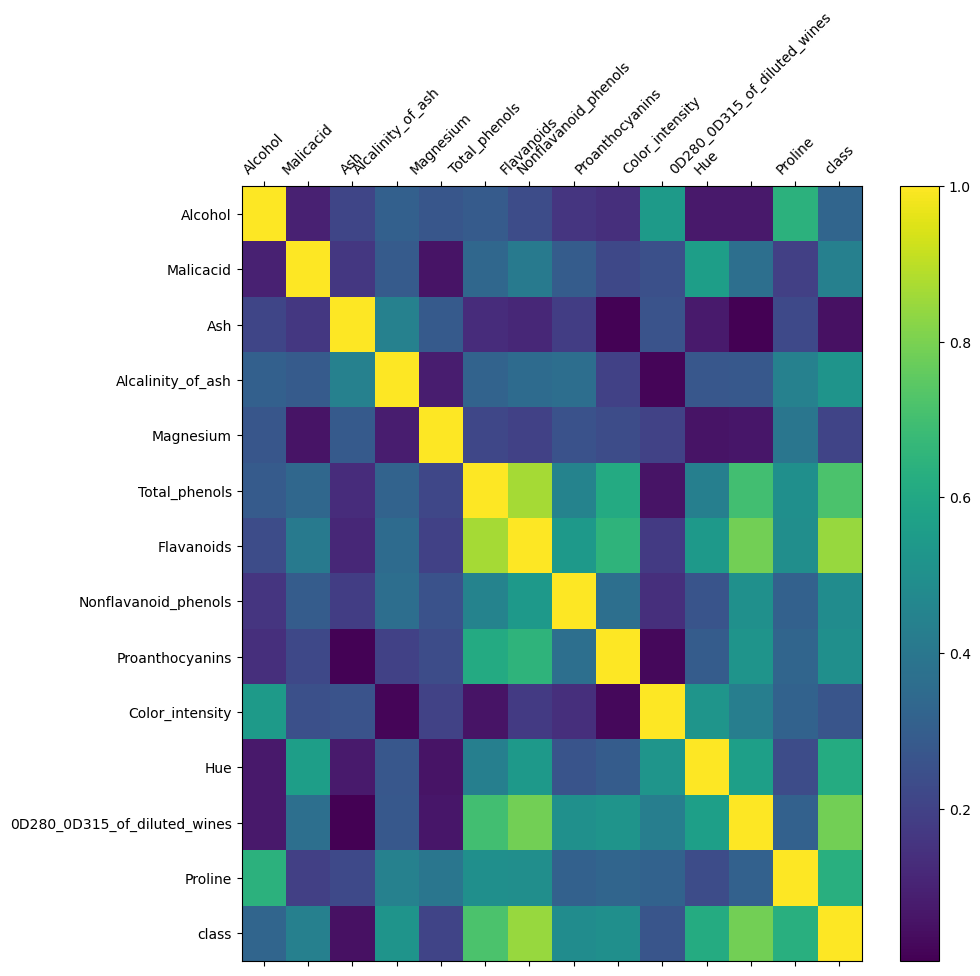

In [33]:
corr_wine_df = wine_std.corr()
abs_corr_wine_df = np.abs(corr_wine_df)
plt.figure(figsize = (10, 20))
plt.matshow(abs_corr_wine_df, aspect = 'auto')
plt.xticks([i for i in range(len(wine_df.columns))], [i for i in wine_df.columns], rotation = 45)
plt.yticks([i for i in range(len(wine_df.columns))], [i for i in wine_df.columns])
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
# first test out linear regression